### とにかく「shit + Enter」を押していくと、上から実行していきます。


In [167]:
######################################################################################
######################################################################################
# 多変量解析
######################################################################################
######################################################################################

In [168]:
# import
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy # pip install scipy
import statsmodels # pip install statsmodels


In [169]:

# データファイルを読み込みます。

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/health_parameters.csv'
xmat = pd.read_csv(url)

xmat

,Name,Alice,Bob,Charlie,David,Eva,Frank,Grace,Hannah,Ivy,John
0,Body Weight (kg),57.610417,69.885877,99.239703,89.827506,54.295298,70.592433,53.866029,83.926989,57.144487,86.353718
1,Height (cm),175.996393,181.290770,189.132896,187.644023,156.459600,154.159988,150.151290,159.001325,162.813941,184.514874
2,BMI,18.786507,20.659982,22.559459,21.759206,25.305027,28.616694,27.289212,19.778940,23.131414,18.759845
3,Body Fat Percentage (%),24.866068,11.797085,34.608242,10.665353,16.951926,24.071701,29.196798,19.948289,27.882388,34.517226
4,Waist Circumference (cm),108.211731,73.526117,95.834333,117.146546,104.951442,80.891488,75.457995,84.752505,92.763740,91.059666
5,Hip Circumference (cm),83.574593,112.837857,108.334789,123.529229,85.463941,118.165903,116.408781,82.252866,94.648403,127.399558
6,Waist-to-Hip Ratio,0.721329,0.869728,0.810786,0.759572,0.727878,0.934419,0.790541,0.721786,0.921035,0.782365
7,Systolic Blood Pressure (mmHg),117.675102,104.052238,128.830152,99.463001,91.951505,96.781100,101.947694,103.872331,107.991706,127.708578
8,Diastolic Blood Pressure (mmHg),74.645709,64.939187,63.003759,77.983987,63.076780,64.331227,86.699458,88.909498,77.437191,84.160122
9,Heart Rate (bpm),66.191575,77.142878,68.250208,65.136431,93.646964,65.590661,93.891095,75.387045,62.431572,82.009947


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


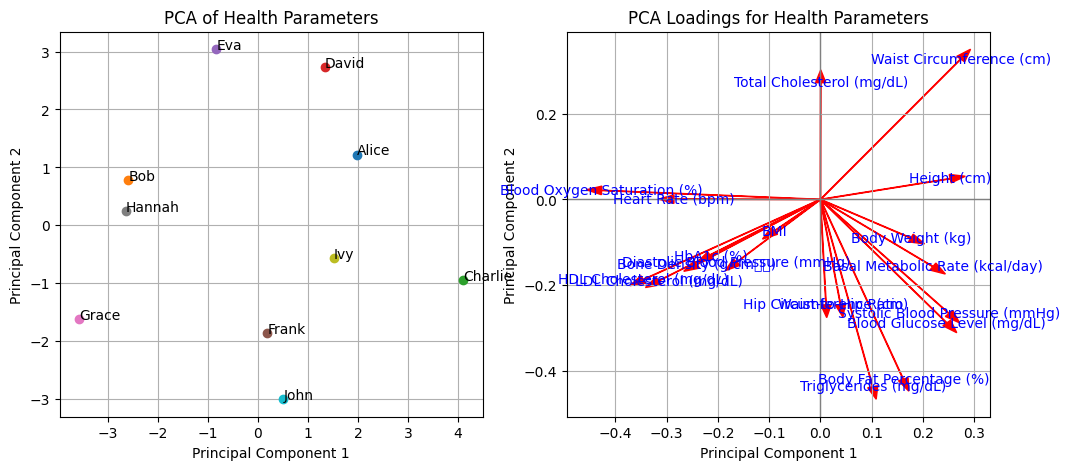

In [170]:
# PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# データ部分だけとってきて、numpyにします。
x = xmat.iloc[:,1:].values.copy()

# それぞれのスケールを等しくするために、平均０、標準偏差１に正規化します。
x_normalized = (x - x.mean(axis=1, keepdims=True)) / x.std(axis=1, keepdims=True)

# PCA実行
pca = PCA(n_components=3)
xpc = pca.fit_transform(x_normalized.T)

# グラフを書く
plt.figure(figsize=(12,5))
plt.subplot(121)
for i in range(x.shape[1]):
  plt.plot(xpc[i,0], xpc[i,1],'o')
  plt.text(xpc[i,0], xpc[i,1], xmat.columns[i+1])

plt.title('PCA of Health Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


# 各パラメタの寄与を表示
kiyo = pca.components_.T

plt.subplot(122)
for i in range(xmat.shape[0]):
    plt.arrow(0, 0, kiyo[i, 0], kiyo[i, 1], color='r', head_width=0.02)
    plt.text(kiyo[i, 0], kiyo[i, 1], xmat.Name[i], color='b', ha='center', va='center')

plt.title('PCA Loadings for Health Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()


Text(0, 0.5, 'Distance')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)


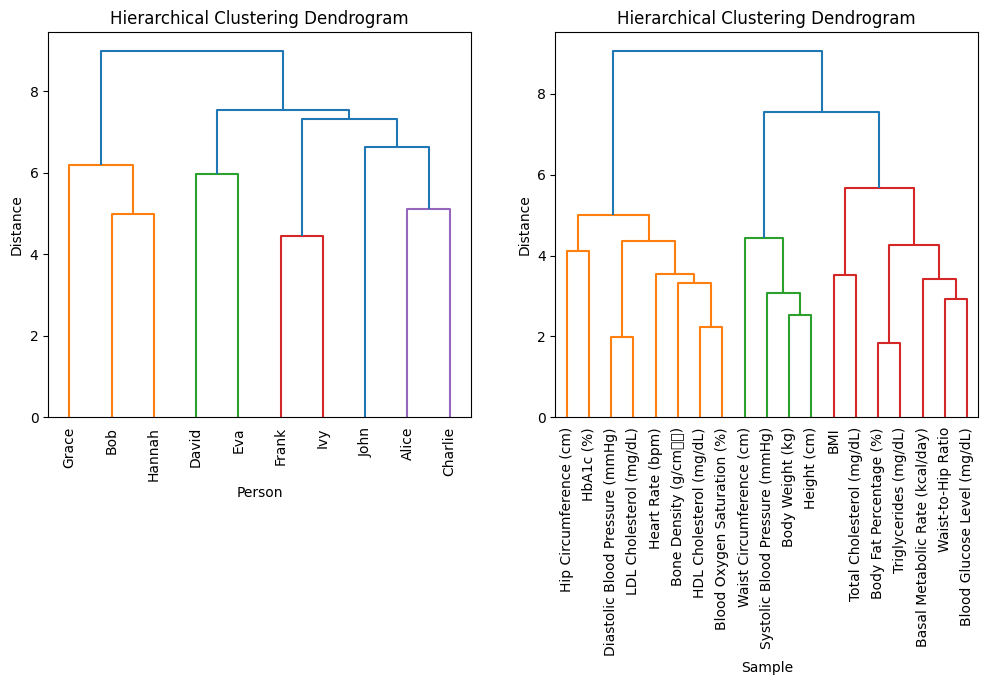

In [171]:
# 階層クラスタリング

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# データ部分だけとってきて、numpyにします。
x = xmat.iloc[:,1:].values.copy()

# それぞれのスケールを等しくするために、平均０、標準偏差１に正規化します。
x_normalized = (x - x.mean(axis=1, keepdims=True)) / x.std(axis=1, keepdims=True)


# 各個人が行になるように転置
x_transposed = x_normalized.T

# 階層クラスタリング（ward法）
Z = linkage(x_transposed, method='ward')

# Plot the dendrogram
# グラフを書く
plt.figure(figsize=(12,5))
plt.subplot(121)
dendrogram(Z, labels=xmat.columns[1:], leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Person')
plt.ylabel('Distance')


# 逆に、パラメタに対してもやってみる

# 階層クラスタリング（ward法）
Z = linkage(x_normalized, method='ward')

# グラフを書く
plt.subplot(122)
dendrogram(Z, labels=xmat["Name"].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')




In [172]:
######################################################################################
######################################################################################
# 時系列因果解析
######################################################################################
######################################################################################

,Unnamed: 0,A,B
0,0,2.257853,2.257853
1,1,3.017471,3.213182
2,2,3.245773,3.438982
3,3,3.213176,3.276460
4,4,3.524578,3.317734
...,...,...,...
296,296,0.872420,0.064627
297,297,1.234664,0.032286
298,298,0.605464,0.004461
299,299,0.483939,0.001902


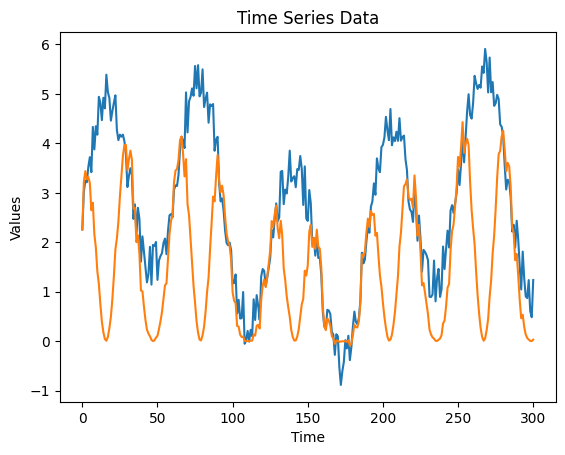

In [173]:

# データファイルを読み込みます。
# Aは、Aだけで適当につくったデータ。例えば気温だとする
# Bは、Aの状態に依存して適当につくったデータ。例えば人の気分のパラメタだとする。
# BはAに依存するが、逆はしない。この因果関係を当てれるか？という話。

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/timeseries.csv'
data = pd.read_csv(url)

# プロット

plt.plot(data['Unnamed: 0'], data['A'], label='A')
plt.plot(data['Unnamed: 0'], data['B'], label='B')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Values')

# 表示
data

For A:  ADF Statistic= -7.144147880652194 ; p-value= 3.2657220418668163e-10
For B:  ADF Statistic= -3.6649448214768086 ; p-value= 0.004634144821001699
For B+:  ADF Statistic= -0.31613130287246427 ; p-value= 0.9231883807036498
                               SARIMAX Results                                
Dep. Variable:                      A   No. Observations:                  301
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -158.932
Date:                Tue, 06 Aug 2024   AIC                            323.865
Time:                        09:03:55   BIC                            334.976
Sample:                             0   HQIC                           328.311
                                - 301                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


A to B:  {1: ({'ssr_ftest': (0.40412360009940973, 0.5254568273002143, 297.0, 1), 'ssr_chi2test': (0.40820565666607045, 0.5228816509540115, 1), 'lrtest': (0.40792818857187285, 0.5230229524704071, 1), 'params_ftest': (0.40412360009939624, 0.5254568273002143, 297.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x79845a7b04f0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x79845a7b0400>, array([[0., 1., 0.]])])}
B to A:  {1: ({'ssr_ftest': (0.06603061030141702, 0.7973843183055473, 297.0, 1), 'ssr_chi2test': (0.0666975861630475, 0.7962072130414127, 1), 'lrtest': (0.06669017298190738, 0.7962182892033268, 1), 'params_ftest': (0.06603061030141505, 0.7973843183055473, 297.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7984b23cbc10>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7984b23c8190>, array([[0., 1., 0.]])])}


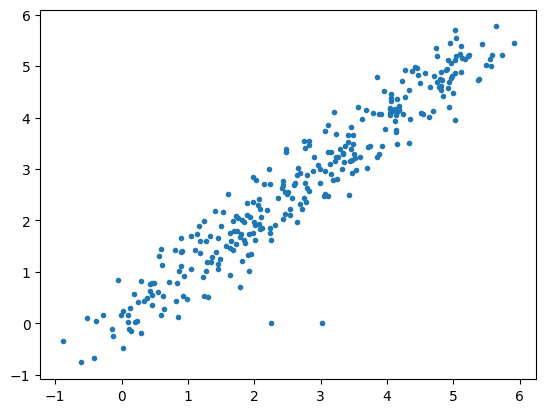

In [174]:
# 色んな時系列解析

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.arima.model import ARIMA


# 拡張ディッキー–フラー検定(ADF検定；定常か否か)
adf_test = adfuller(data['A'])
print('For A: ', 'ADF Statistic=', adf_test[0], '; p-value=', adf_test[1]) #p<0.05で定常

adf_test = adfuller(data['B'])
print('For B: ', 'ADF Statistic=', adf_test[0], '; p-value=', adf_test[1]) #p<0.05で定常

adf_test = adfuller(data['B']+np.arange(len(data['B'])))
print('For B+: ', 'ADF Statistic=', adf_test[0], '; p-value=', adf_test[1]) #増え続けるような値を敢えて足すと、p>0.05で非定常


# ARIMAモデル
arima_model_a = ARIMA(data['A'], order=(1, 1, 1)).fit()
arima_summary_a = arima_model_a.summary()
print(arima_summary_a)

# ARIMA確認
a1 = -0.1773 # ar.L1
m1 = -0.1127 # ma.L1
y = np.zeros_like(data['A'])
for i in np.arange(1,len(y)-1):
  y[i+1] = data['A'][i] +  a1*(data['A'][i]-data['A'][i-1])+m1*arima_model_a.resid[i]
plt.plot(data['A'], y,'.')


# Granger因果('ssr_ftest': (xxx, xxx, xxx, xxx) の２番目がp値)
granger_test_result = grangercausalitytests(data[['A', 'B']], 1, verbose=False)
print('A to B: ', granger_test_result) # 「AがBに対してグレンジャー因果関係がない」 = 「Aの過去の値がBの将来の値に対して統計的に有意な予測力を持たない」（AがBに影響しない的）

granger_test_result = grangercausalitytests(data[['B', 'A']], 1, verbose=False)
print('B to A: ', granger_test_result)



In [175]:
# Empirical Dynamic Modeling（経験的動的モデリング）
# まずはインストール
!pip install pyEDM


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


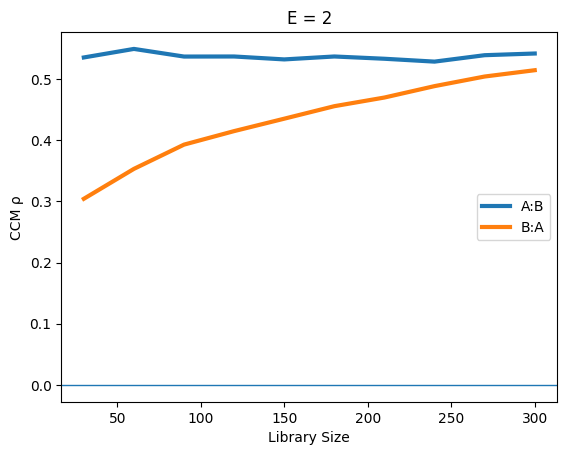

,LibSize,A:B,B:A
0,30,0.535433,0.304339
1,60,0.549394,0.353270
2,90,0.536918,0.392916
3,120,0.537023,0.415014
4,150,0.532236,0.435308
5,180,0.537032,0.455757
6,210,0.533315,0.469920
7,240,0.528636,0.488552
8,270,0.539133,0.504262
9,300,0.541890,0.514580


In [176]:
# EDMのCCM（Convergent cross mapping：因果関係解析）を実施。
# A→Bを予想する場合には、最初から高い値だが、データを増やしても増えていかない。つまり、AはBから影響を受けない。
# B→Aを予想する場合には、データを増やすと予測力が上がる。それはBの時系列データの中にAの情報が含まれていることを意味する。つまり、BはAから影響を受けている。

import pyEDM
# https://sugiharalab.github.io/EDM_Documentation/ccm_/

pyEDM.CCM( dataFrame = data, E = 2, Tp = 0, columns = "A", target = "B", libSizes = "30 300 30", sample = 100, showPlot = True)


In [177]:
######################################################################################
######################################################################################
# 機械学習
######################################################################################
######################################################################################

In [178]:
import tensorflow as tf

# Load MNIST dataset from tensorflow
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)


X_train :  (60000, 28, 28)
y_train :  (60000,)
X_test :  (10000, 28, 28)
y_test :  (10000,)


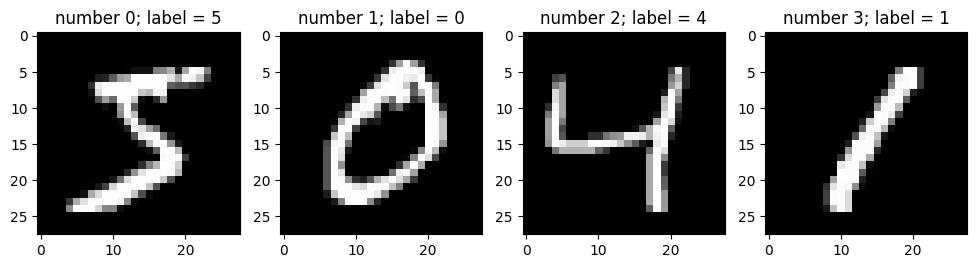

In [179]:
# ちょっと絵を見てみる

plt.figure(figsize=(12,3))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"number {i}; label = {y_train[i]}")


In [180]:

# モデルの作成
model = tf.keras.models.Sequential([
    # (None, 28, 28) -> (None, 784)
    tf.keras.layers.Flatten(input_shape=(28, 28), name='input'),

    # Layer1: Linear mapping: (None, 784) -> (None, 256)
    tf.keras.layers.Dense(256, name='784->256'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu'),

    # Layer2: Linear mapping: (None, 256) -> (None, 10)
    tf.keras.layers.Dense(10, name='256->10'),
    # Activation function: Softmax
    tf.keras.layers.Activation(tf.nn.softmax, name='softmax')
])

# モデル構造を表示
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Flatten)                      │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 784->256 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu (Activation)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 256->10 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Activation)                 │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
# コンパイル
# 最適化アルゴリズム、評価の基準、評価の指標などを指定する
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [182]:
# 学習（Training）
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8422 - loss: 10.7717 - val_accuracy: 0.9283 - val_loss: 1.0702
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9446 - loss: 0.6559 - val_accuracy: 0.9357 - val_loss: 0.6002
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9542 - loss: 0.2982 - val_accuracy: 0.9458 - val_loss: 0.4871
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9675 - loss: 0.1869 - val_accuracy: 0.9516 - val_loss: 0.4072
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9696 - loss: 0.1619 - val_accuracy: 0.9496 - val_loss: 0.4393


In [183]:
# モデルの評価(evaluation)

# トレーニングしたデータでやると、当然ながら高い
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))


# テストデータ、つまりトレーニング中には一度も見たことないデータでやると、少し低くなる
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9701 - loss: 0.1442
loss(train): 0.1438
accuracy(train): 0.9697
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9432 - loss: 0.5160
loss(test): 0.4393
accuracy(test): 0.9496


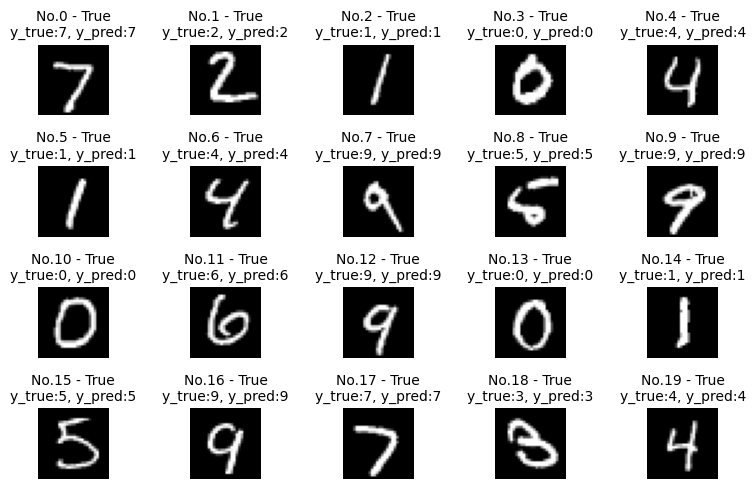

In [184]:
# 学習したモデルがどのように答えているかの確認

fig = plt.figure(figsize=(8, 5))

ROW = 4
COLUMN = 5

for i in range(ROW * COLUMN):
    y_true = y_test[i]
    y_pred = model.predict(X_test[i].reshape(1,28,28), verbose=0)[0].argmax()

    if y_true == y_pred:
        result = "True" # Correct answer from the model
    else:
        result = "False" # Incorrect answer from the model

    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("No.{} - {}\ny_true:{}, y_pred:{}".format(i, result, y_true, y_pred), fontsize=10)
    plt.axis("off")

fig.tight_layout()
fig.show()



In [185]:
# もっと大きなモデルで、たくさん学習を繰り返すと、ちょっと精度が上がる。

# モデルの作成
model = tf.keras.models.Sequential([
    # (None, 28, 28) -> (None, 784)
    tf.keras.layers.Flatten(input_shape=(28, 28), name='input'),

    # Layer1: Linear mapping: (None, 784) -> (None, 512)
    tf.keras.layers.Dense(512, name='fc_1'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu_1'),

    # Layer2: Linear mapping: (None, 512) -> (None, 256)
    tf.keras.layers.Dense(256, name='fc_2'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu_2'),

    # Layer3: Linear mapping: (None, 256) -> (None, 256)
    tf.keras.layers.Dense(256, name='fc_3'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu_3'),

    # Layer4: Linear mapping: (None, 256) -> (None, 10)
    tf.keras.layers.Dense(10, name='dense_3'),
    # Activation function: Softmax
    tf.keras.layers.Activation(tf.nn.softmax, name='softmax')
])

# コンパイル
# 最適化アルゴリズム、評価の基準、評価の指標などを指定する
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 学習（Training）
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.8223 - loss: 5.2949 - val_accuracy: 0.9404 - val_loss: 0.2686
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9491 - loss: 0.2120 - val_accuracy: 0.9481 - val_loss: 0.2243
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9629 - loss: 0.1407 - val_accuracy: 0.9555 - val_loss: 0.1931
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9700 - loss: 0.1055 - val_accuracy: 0.9595 - val_loss: 0.1769
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9707 - loss: 0.1089 - val_accuracy: 0.9594 - val_loss: 0.2094
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9721 - loss: 0.1017 - val_accuracy: 0.9560 - val_loss: 0.1889
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9778 - loss: 0.0785 - val_accuracy: 0.9684 - val_loss: 0.1381
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9786 - loss: 0.0779 - 

In [186]:
# モデルの評価(evaluation)

# トレーニングしたデータでやると、当然ながら高い
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))


# テストデータ、つまりトレーニング中には一度も見たことないデータでやると、少し低くなる
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9838 - loss: 0.0554
loss(train): 0.05195
accuracy(train): 0.9845
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9676 - loss: 0.1454
loss(test): 0.126
accuracy(test): 0.9703
